# From JUL 21 2020 only

In [94]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as md
from scipy.ndimage import median_filter

In [30]:
glider_filename = "cp_514-20200613T2130-delayed_3c7a_cd08_61eb.csv"
glider_data = pd.read_csv(glider_filename)

In [31]:
ibuoy_filename = "ooi-cp03issm-rid27-02-flortd000_ceeb_2bdc_d098.csv"
cbuoy_filename = "ooi-cp01cnsm-rid27-02-flortd000_afd5_d615_3e8c.csv"
obuoy_filename = "ooi-cp04ossm-rid27-02-flortd000_4584_01fb_5e10.csv"

ibuoy_data = pd.read_csv(ibuoy_filename, skiprows=[1])
cbuoy_data = pd.read_csv(cbuoy_filename, skiprows=[1])
obuoy_data = pd.read_csv(obuoy_filename, skiprows=[1])

In [76]:
# Convert time to datetime
ibuoy_data["time"] = pd.to_datetime(ibuoy_data["time"])
ibuoy_data["datenum"] = md.date2num(ibuoy_data["time"])
cbuoy_data["time"] = pd.to_datetime(cbuoy_data["time"])
cbuoy_data["datenum"] = md.date2num(cbuoy_data["time"])
obuoy_data["time"] = pd.to_datetime(obuoy_data["time"])
obuoy_data["datenum"] = md.date2num(obuoy_data["time"])
glider_data["time (UTC)"] = pd.to_datetime(glider_data["time (UTC)"])
glider_data["datenum"] = md.date2num(glider_data["time (UTC)"])

In [77]:
glider_data

,time (UTC),latitude (degrees_north),longitude (degrees_east),depth (m),chlorophyll (ug l-1),datenum
0,2020-07-21 00:55:03+00:00,39.937544,-70.509564,6.003600,0.2982,737627.038229
1,2020-07-21 00:55:03+00:00,39.937544,-70.509564,NaN,NaN,737627.038229
2,2020-07-21 00:55:03+00:00,39.937544,-70.509564,NaN,0.3550,737627.038229
3,2020-07-21 00:55:03+00:00,39.937544,-70.509564,NaN,0.3621,737627.038229
4,2020-07-21 00:55:03+00:00,39.937544,-70.509564,NaN,0.3550,737627.038229
...,...,...,...,...,...,...
222889,2020-07-23 23:42:43+00:00,40.065038,-71.166771,NaN,NaN,737629.987998
222890,2020-07-23 23:42:43+00:00,40.065038,-71.166771,15.390518,1.3703,737629.987998
222891,2020-07-23 23:42:43+00:00,40.065038,-71.166771,NaN,1.3490,737629.987998
222892,2020-07-23 23:42:43+00:00,40.065038,-71.166771,15.241679,1.3064,737629.987998


In [33]:
glider_data.columns

Index(['time (UTC)', 'latitude (degrees_north)', 'longitude (degrees_east)',
       'depth (m)', 'chlorophyll (ug l-1)'],
      dtype='object')

In [34]:
ibuoy_data

,time,mass_concentration_of_chlorophyll_a_in_sea_water,z
0,2014-12-14T19:00:00Z,0.999336,0.0
1,2014-12-14T19:01:00Z,1.033066,0.0
2,2014-12-14T19:02:00Z,1.081466,0.0
3,2014-12-14T19:03:00Z,0.919600,0.0
4,2014-12-14T19:15:00Z,0.965695,0.0
...,...,...,...
912749,2022-11-13T10:48:00Z,0.832300,0.0
912750,2022-11-13T11:00:00Z,0.845318,0.0
912751,2022-11-13T11:01:00Z,0.858215,0.0
912752,2022-11-13T11:02:00Z,0.845219,0.0


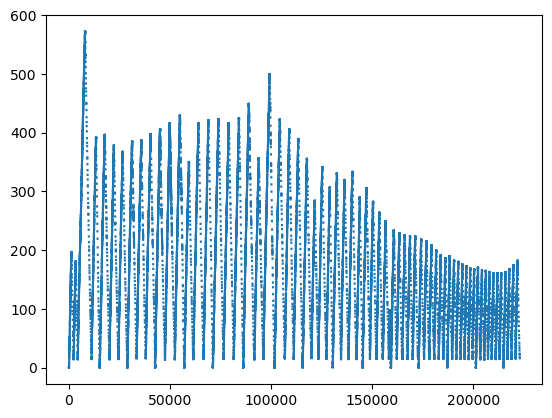

In [37]:
plt.plot(glider_data['depth (m)'])
#plt.ylim([0,30])

In [9]:
ibuoy_data

,time,mass_concentration_of_chlorophyll_a_in_sea_water,z
0,2014-12-14T19:00:00Z,0.999336,0.0
1,2014-12-14T19:01:00Z,1.033066,0.0
2,2014-12-14T19:02:00Z,1.081466,0.0
3,2014-12-14T19:03:00Z,0.919600,0.0
4,2014-12-14T19:15:00Z,0.965695,0.0
...,...,...,...
912749,2022-11-13T10:48:00Z,0.832300,0.0
912750,2022-11-13T11:00:00Z,0.845318,0.0
912751,2022-11-13T11:01:00Z,0.858215,0.0
912752,2022-11-13T11:02:00Z,0.845219,0.0


In [44]:
#pd.to_datetime(ibuoy_data["time"])
ibuoy_data.time.dt.month

0         12
1         12
2         12
3         12
4         12
          ..
912749    11
912750    11
912751    11
912752    11
912753    11
Name: time, Length: 912754, dtype: int32

['AQUA_MODIS.20160228.L3m.DAY.CHL.x_chlor_a.nc']

In [53]:
pd.to_datetime(modis_data.time_coverage_start)

Timestamp('2016-02-28 00:20:00+0000', tz='UTC')

In [71]:
# Looking at sat data
modis_data = xr.open_dataset('aqua_modis/AQUA_MODIS.20150111.L3m.DAY.CHL.x_chlor_a.nc')
#modis_data

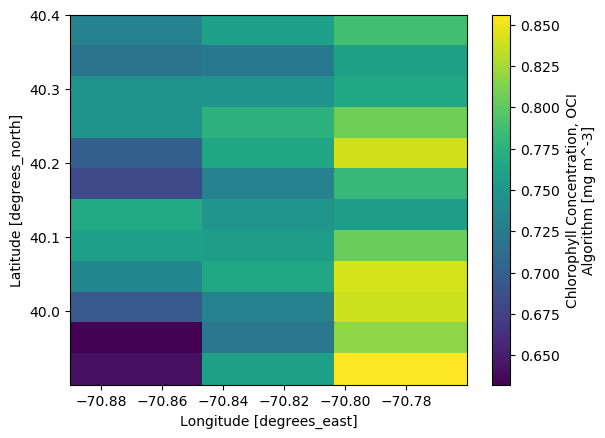

In [11]:
plt.figure()
modis_data.chlor_a.plot()

+ Inshore Surface Mooring 
   + 40.3619, -70.8783 - corresponds to 1,0
+ Coastal Pioneer: Central Surface Mooring
   + 40.1334, -70.7785 - corresponds to 6,2
+ Coastal Pioneer: Offshore Surface Mooring
   + 39.9371, -70.887 - corresponds to 10,0

In [12]:
ibuoy_idx = (1,0)
cbuoy_idx = (6,2)
obuoy_idx = (10,0)

In [13]:
# Indexing into data - upper left corner is 0,0, in row, col order
float(modis_data.chlor_a[ibuoy_idx])

0.7180849313735962

In [14]:
float(modis_data.chlor_a[cbuoy_idx])

0.7557186484336853

In [15]:
float(modis_data.chlor_a[obuoy_idx])

0.632262647151947

In [69]:
sat_files = []
sat_times = []
sat_ibuoy = []
sat_cbuoy = []
sat_obuoy = []

for file in os.listdir("aqua_modis"):
    sat_files.append(file)
    modis_data = xr.open_dataset("aqua_modis/" + file)
    times = pd.to_datetime(modis_data.time_coverage_start)
    sat_times.append(times)
    sat_ibuoy.append(float(modis_data.chlor_a[ibuoy_idx]))
    sat_cbuoy.append(float(modis_data.chlor_a[cbuoy_idx]))
    sat_obuoy.append(float(modis_data.chlor_a[obuoy_idx]))

In [70]:
sat_dict = {"filename": sat_files, 
            "timestamp": sat_times, 
            "datenum": md.date2num(sat_times),
            "ibuoy_chl": sat_ibuoy, 
            "cbuoy_chl": sat_cbuoy, 
            "obuoy_chl": sat_obuoy} 
   
sat_data = pd.DataFrame(sat_dict)
sat_data

,filename,timestamp,datenum,ibuoy_chl,cbuoy_chl,obuoy_chl
0,AQUA_MODIS.20160228.L3m.DAY.CHL.x_chlor_a.nc,2016-02-28 00:20:00+00:00,736022.013889,0.976970,1.008007,0.833190
1,AQUA_MODIS.20151022.L3m.DAY.CHL.x_chlor_a.nc,2015-10-22 00:10:01+00:00,735893.006956,1.289059,0.754561,1.226837
2,AQUA_MODIS.20150430.L3m.DAY.CHL.x_chlor_a.nc,2015-04-30 00:45:01+00:00,735718.031262,0.392804,0.595640,NaN
3,AQUA_MODIS.20150814.L3m.DAY.CHL.x_chlor_a.nc,2015-08-14 00:00:01+00:00,735824.000012,0.216557,0.354543,0.208217
4,AQUA_MODIS.20160618.L3m.DAY.CHL.x_chlor_a.nc,2016-06-18 00:10:01+00:00,736133.006956,0.863061,0.825349,0.738708
...,...,...,...,...,...,...
295,AQUA_MODIS.20161201.L3m.DAY.CHL.x_chlor_a.nc,2016-12-01 00:35:00+00:00,736299.024306,1.229114,1.010126,NaN
296,AQUA_MODIS.20150225.L3m.DAY.CHL.x_chlor_a.nc,2015-02-25 00:20:00+00:00,735654.013889,0.952812,1.052035,0.356231
297,AQUA_MODIS.20160720.L3m.DAY.CHL.x_chlor_a.nc,2016-07-20 00:10:01+00:00,736165.006956,0.560889,0.404815,0.303990
298,AQUA_MODIS.20160721.L3m.DAY.CHL.x_chlor_a.nc,2016-07-21 00:45:01+00:00,736166.031262,0.452670,0.332006,0.307655


In [ ]:
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
#xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
#plt.plot_date(ibuoy_data["datenum"].values,ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
#filtered_ibuoy = median_filter(ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values, size=600)
plt.plot_date(ibuoy_data["datenum"].values,ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
plt.plot_date(sat_data["datenum"].values,sat_data["ibuoy_chl"].values)

plt.plot_date(cbuoy_data["datenum"].values,cbuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
plt.plot_date(sat_data["datenum"].values,sat_data["cbuoy_chl"].values)

plt.plot_date(obuoy_data["datenum"].values,obuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
plt.plot_date(sat_data["datenum"].values,sat_data["obuoy_chl"].values)

plt.xlim([735500,736522])
plt.ylim([-1,12])
plt.show()

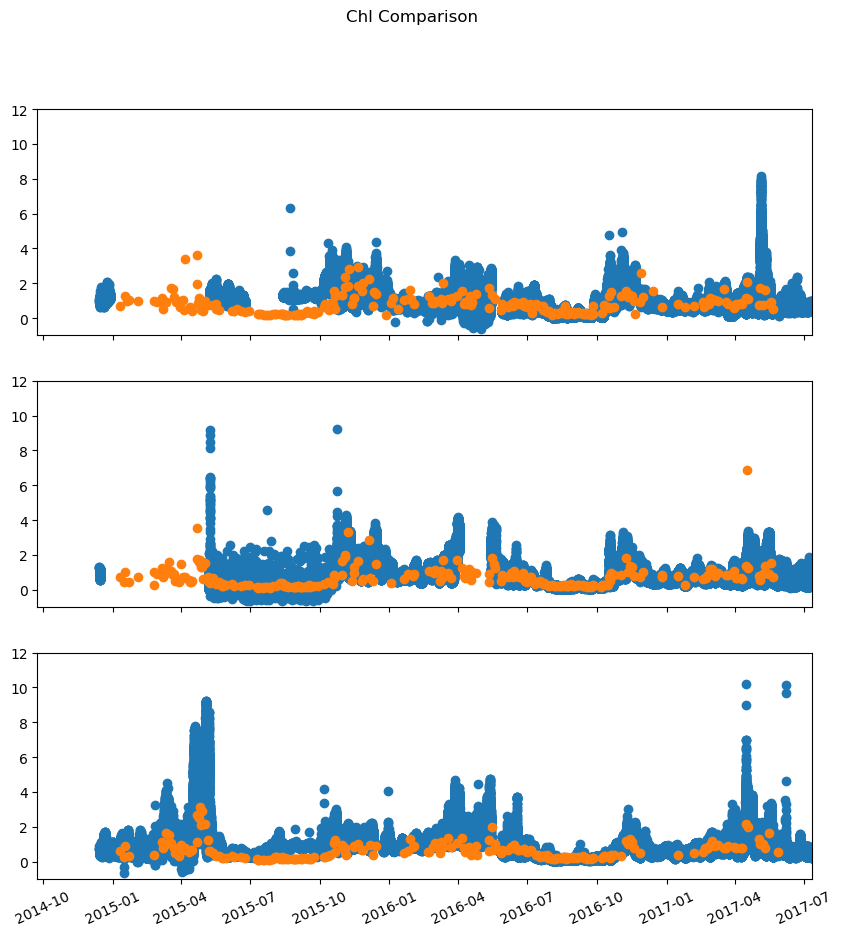

In [122]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=[10,10])
fig.suptitle('Chl Comparison')

plt.xticks( rotation=25 )
ax=plt.gca()
#xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
#plt.plot_date(ibuoy_data["datenum"].values,ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
#filtered_ibuoy = median_filter(ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values, size=600)

axs[0].plot_date(ibuoy_data["datenum"].values,ibuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
axs[0].plot_date(sat_data["datenum"].values,sat_data["ibuoy_chl"].values)

axs[1].plot_date(cbuoy_data["datenum"].values,cbuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
axs[1].plot_date(sat_data["datenum"].values,sat_data["cbuoy_chl"].values)

axs[2].plot_date(obuoy_data["datenum"].values,obuoy_data["mass_concentration_of_chlorophyll_a_in_sea_water"].values)
axs[2].plot_date(sat_data["datenum"].values,sat_data["obuoy_chl"].values)

plt.xlim([735500,736522])
plt.ylim([-1,12])
plt.show()


In [117]:
#ibuoy_data[ibuoy_data["datenum"].astype(int) == 735581]["mass_concentration_of_chlorophyll_a_in_sea_water"]